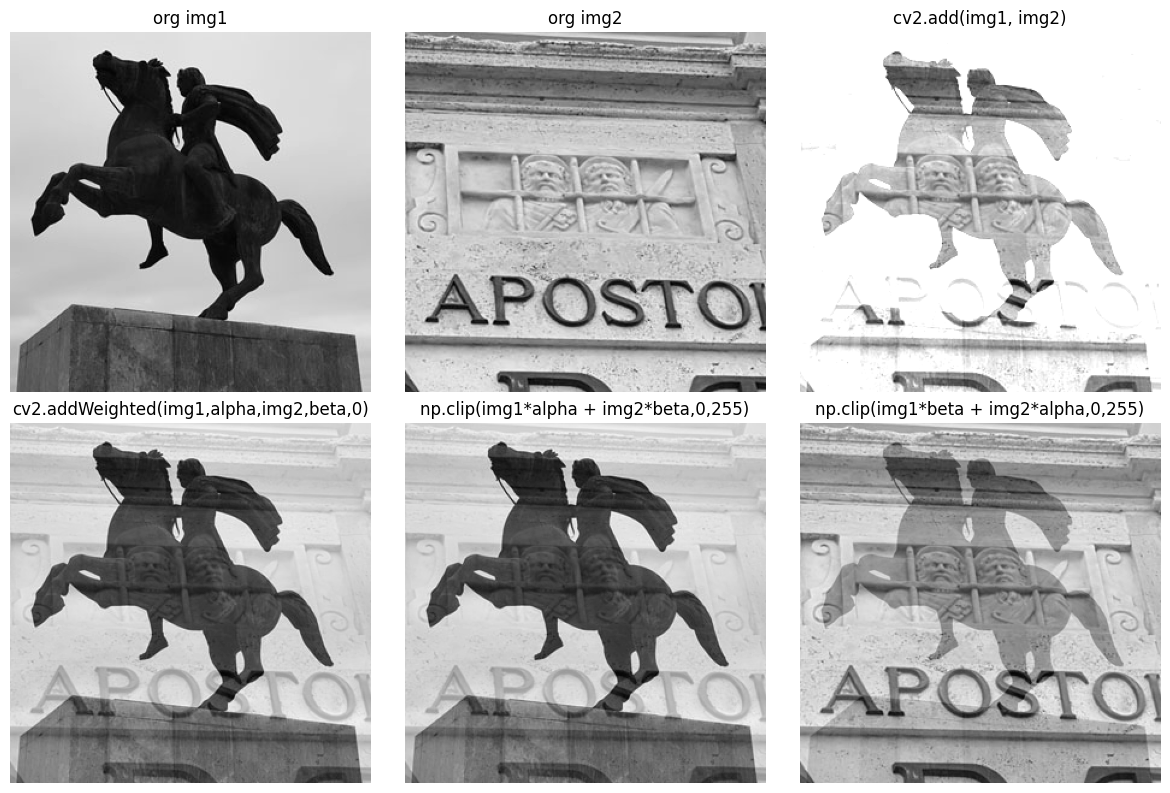

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 이미지 읽기 (그레이스케일)
img1 = cv2.imread("img/add1.jpg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("img/add2.jpg", cv2.IMREAD_GRAYSCALE)

# 두 영상의 비율 설정
alpha = 0.7
beta = 1 - alpha

# 1. 두 영상 단순 더하기
add_img1 = cv2.add(img1, img2)
# 3. 두 영상 비율에 따른 더하기 (OpenCV의 addWeighted 사용)
add_img2 = cv2.addWeighted(img1, alpha, img2, beta, 0) 
# 2. 두 영상의 비율에 따른 더하기 (수동 계산 후 saturation 처리)
# 두 이미지 비율에 따른 더하기
# saturation 처리
add_img3 = np.clip(img1*alpha + img2*beta, 0, 255).astype("uint8")
add_img4 = np.clip(img1*beta + img2*alpha, 0, 255).astype("uint8")

# 제목과 이미지를 순서대로 리스트에 저장
images_and_titles = [
    ('org img1', img1), ('org img2', img2),
    ('cv2.add(img1, img2)', add_img1), 
    ('cv2.addWeighted(img1,alpha,img2,beta,0)', add_img2),
    ('np.clip(img1*alpha + img2*beta,0,255)', add_img3),
    ('np.clip(img1*beta + img2*alpha,0,255)', add_img4), 
]

# 서브플롯의 행과 열 수
rows, cols = 2, 3

# 서브플롯 개수 정의
fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))

# axes를 flatten하여 1차원 배열로 변환
axes = axes.flatten()

# title과 img를 순차적으로 출력
for i, (title, img) in enumerate(images_and_titles):
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(title)
    axes[i].axis('off')

# 레이아웃 조정
plt.tight_layout()
plt.show()
